In [1]:
# If running in Google Colab, uncomment the following lines to install necessary packages
#!pip install warp-lang==1.7.0
#!pip install --upgrade git+https://github.com/psheehan/pinball-warp.git

In [1]:
from pinballrt.sources import Star
from pinballrt.grids import UniformCartesianGrid
from pinballrt.model import Model

import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np

In [2]:
star = Star()
star.set_blackbody_spectrum()

In [3]:
model = Model(grid=UniformCartesianGrid, grid_kwargs={"ncells":9, "dx":2.0*u.au})

density = np.ones(model.grid.shape)*1.0e-16 * u.g / u.cm**3
amax = np.ones(model.grid.shape)
amax[4, 4, 4] = 0.001

model.add_density(density, "../pinballrt/tests/data/amax.dst", amax=amax)
model.add_star(star)

Warp CUDA warning: Could not find or load the NVIDIA CUDA driver. Proceeding in CPU-only mode.
/usr/local/python/3.12.1/lib/python3.12/site-packages/astropy/units/quantity.py:653: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/python/3.12.1/lib/python3.12/site-packages/astropy/units/quantity.py:653: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Warp 1.9.1 initialized:
   CUDA driver not found or failed to initialize
   Devices:
     "cpu"      : "x86_64"
   Kernel cache:
     /home/codespace/.cache/warp/1.9.1


In [4]:
model.thermal_mc(nphotons=1000000, device="cpu")

Iteration 0
Module pinballrt.sources f7a6df4 load on device 'cpu' took 303.77 ms  (cached)
Module pinballrt.grids ad28659 load on device 'cpu' took 24.69 ms  (cached)


100%|██████████| 1000000/1000000 [00:04<00:00, 211063.74it/s]


0
Iteration 1


100%|██████████| 1000000/1000000 [00:20<00:00, 49909.71it/s]


1
Iteration 2


100%|██████████| 1000000/1000000 [00:27<00:00, 36807.06it/s]


2 1.2607521 4.1615677
Iteration 3


100%|██████████| 1000000/1000000 [00:27<00:00, 36473.00it/s]


3 1.0325086 1.2210572
Iteration 4


100%|██████████| 1000000/1000000 [00:27<00:00, 36176.17it/s]

4 1.0149708 1.0172791


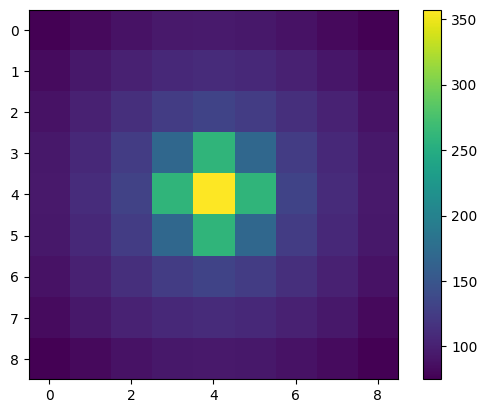

In [5]:
plt.imshow(model.grid_list["cpu"][0].grid.temperature.numpy()[:,:,4])
plt.colorbar()
plt.show()

In [7]:
image = model.make_image(npix=256, pixel_size=0.2*u.arcsec, lam=np.array([1., 1000.])*u.micron, incl=45.*u.degree, pa=45.*u.degree, distance=1.*u.pc, device='cpu')

100%|██████████| 100000/100000 [00:01<00:00, 93244.03it/s]


Time: 1.7536976337432861


100%|██████████| 100000/100000 [00:00<00:00, 422135.02it/s]


Time: 0.8711729049682617
65536
Module pinballrt.camera 82113d2 load on device 'cpu' took 1.48 ms  (cached)


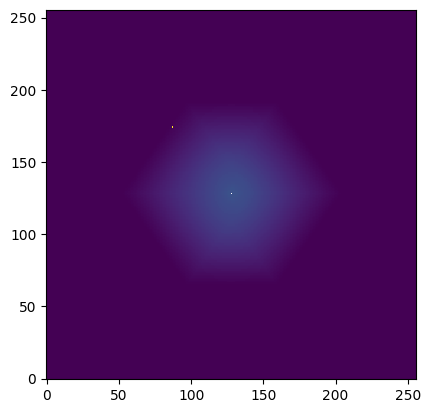

In [10]:
plt.imshow(image.intensity[:,:,1], origin="lower", interpolation="none")
plt.show()